In this project, we use the learnings from week-3, week-4 and week-5 to evaluate the performance among various self-ideated portfolios and compare them against the larger market (S&P TSX 60 Index) following this, we use Monte Carlo Simulation to calculate the expected portfolio returns.

The historical prices for the tickers in the portfolio are extracted using APIs.

The goal is to determine which portfolio is performing the best across multiple areas: Volatility, Returns, Risk, and Sharpe ratios. This quantitative analysis will have the following steps:

* Performance Analysis
* Risk Analysis
* Rolling Statistics
* Sharpe Ratios

The second task is to develop a planning tool that will use the fetched historical closing prices for portfolios, then run Monte Carlo simulations to project the portfolio performance at 30 years (Cumulative Portfolio Return Trajectories). We then use the Monte Carlo data to calculate the expected portfolio returns given a specific initial investment amount.

In [1]:
# Initial imports
import os
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from yahoofinancials import YahooFinancials
import seaborn as sns
import hvplot.pandas
from MCForecastTools import MCSimulation

%matplotlib inline

## Custom Portfolio - 1 | Low-Beta Portfolio (Low-Risk)

In [2]:
stock_symbols_1 = ['LLY', 'NVO', 'WMT', 'JNJ', 'PG', 'MRK', 'ABBV', 'KO', 'PEP', 'AZN']

# Create an object that allows us to interact with Yahoo Finance's API to fetch financial data for the specified stocks.
yahoo_financials_1 = YahooFinancials(stock_symbols_1)

# This method returns a dictionary containing historical price data for each stock symbol:
data_1 = yahoo_financials_1.get_historical_price_data(start_date='2018-09-30', 
                                                  end_date='2023-09-30',
                                                  time_interval='daily')

In [3]:
low_beta_portfolio = pd.DataFrame({
    a: {x['formatted_date']: x['close'] for x in data_1[a]['prices']} for a in stock_symbols_1})

In [4]:
# Ensuring the index is in date time format
low_beta_portfolio.index = pd.to_datetime(low_beta_portfolio.index, format='mixed', infer_datetime_format=True)

In [5]:
display(low_beta_portfolio.head())
display(low_beta_portfolio.tail())

,LLY,NVO,WMT,JNJ,PG,MRK,ABBV,KO,PEP,AZN
2018-10-01,107.599998,23.280001,94.400002,139.690002,83.669998,68.253815,95.000000,46.230000,110.709999,39.500000
2018-10-02,107.959999,23.625000,95.150002,140.479996,84.360001,68.463737,94.230003,46.509998,108.720001,39.730000
2018-10-03,108.620003,23.344999,94.070000,139.029999,83.029999,68.101143,96.010002,45.869999,107.519997,40.080002
2018-10-04,112.989998,21.629999,94.209999,139.350006,81.919998,67.958015,93.839996,45.849998,106.610001,39.509998
2018-10-05,115.019997,21.980000,93.309998,139.100006,82.150002,67.776718,94.379997,45.880001,106.489998,39.060001


,LLY,NVO,WMT,JNJ,PG,MRK,ABBV,KO,PEP,AZN
2023-09-25,552.289978,91.129997,163.070007,160.259995,150.660004,105.839996,154.649994,57.000000,174.330002,68.940002
2023-09-26,550.010010,91.790001,162.500000,159.020004,149.320007,105.389999,153.910004,56.529999,172.520004,68.220001
2023-09-27,549.760010,91.699997,161.720001,157.110001,147.339996,103.940002,153.130005,55.950001,169.570007,67.940002
2023-09-28,544.450012,91.519997,162.539993,156.880005,146.339996,104.300003,152.250000,55.810001,169.500000,67.419998
2023-09-29,537.130005,90.940002,159.929993,155.750000,145.860001,102.949997,149.059998,55.980000,169.440002,67.720001


In [6]:
low_beta_portfolio_returns = low_beta_portfolio.pct_change().dropna()

In [7]:
display(low_beta_portfolio_returns.head())
display(low_beta_portfolio_returns.tail())

,LLY,NVO,WMT,JNJ,PG,MRK,ABBV,KO,PEP,AZN
2018-10-02,0.003346,0.014820,0.007945,0.005655,0.008247,0.003076,-0.008105,0.006057,-0.017975,0.005823
2018-10-03,0.006113,-0.011852,-0.011351,-0.010322,-0.015766,-0.005296,0.018890,-0.013760,-0.011038,0.008810
2018-10-04,0.040232,-0.073463,0.001488,0.002302,-0.013369,-0.002102,-0.022602,-0.000436,-0.008464,-0.014222
2018-10-05,0.017966,0.016181,-0.009553,-0.001794,0.002808,-0.002668,0.005754,0.000654,-0.001126,-0.011389
2018-10-08,0.003825,-0.018653,0.014789,0.002085,0.003043,0.006054,0.004556,0.013078,0.015964,-0.018177


,LLY,NVO,WMT,JNJ,PG,MRK,ABBV,KO,PEP,AZN
2023-09-25,0.003179,-0.001862,0.004435,-0.001495,-0.006069,-0.004702,0.012505,-0.010417,-0.005363,0.016364
2023-09-26,-0.004128,0.007242,-0.003495,-0.007737,-0.008894,-0.004252,-0.004785,-0.008246,-0.010383,-0.010444
2023-09-27,-0.000455,-0.000981,-0.004800,-0.012011,-0.013260,-0.013758,-0.005068,-0.010260,-0.017099,-0.004104
2023-09-28,-0.009659,-0.001963,0.005070,-0.001464,-0.006787,0.003464,-0.005747,-0.002502,-0.000413,-0.007654
2023-09-29,-0.013445,-0.006337,-0.016058,-0.007203,-0.003280,-0.012943,-0.020952,0.003046,-0.000354,0.004450


In [8]:
# Understanding the correlation between the stocks in the portfolio
# While the idea of having a diverse portfolio where the stocks are less correlated to each other is ideal, the current build is from market research and literature research
low_beta_portfolio_returns.corr().sum(axis = 1)

LLY     4.908746
NVO     4.222076
WMT     4.348412
JNJ     5.478971
PG      5.468251
MRK     5.115925
ABBV    4.583568
KO      5.168761
PEP     5.802972
AZN     4.560467
dtype: float64

In [9]:
# Set weights
# Equal weights across portfolio

weights = [1/10, 1/10, 1/10, 1/10, 1/10, 1/10, 1/10, 1/10, 1/10, 1/10]

# Calculate portfolio return

portfolio_returns_1 = low_beta_portfolio_returns.dot(weights)

portfolio_returns_1_df = pd.DataFrame({"Low Beta Custom Portfolio": portfolio_returns_1})

In [10]:
display(portfolio_returns_1_df.head())
display(portfolio_returns_1_df.tail())

,Low Beta Custom Portfolio
2018-10-02,0.002889
2018-10-03,-0.004557
2018-10-04,-0.009063
2018-10-05,0.001683
2018-10-08,0.002656


,Low Beta Custom Portfolio
2023-09-25,0.000657
2023-09-26,-0.005512
2023-09-27,-0.008180
2023-09-28,-0.002765
2023-09-29,-0.007308


## Custom Portfolio - 2 | Growth Portfolio

In [11]:
stock_symbols_2 = ['AAPL', 'MSFT', 'AMZN', 'NVDA', 'GOOGL', 'META', 'TSLA', 'AVGO', 'COST', 'ADBE']

# Create an object that allows us to interact with Yahoo Finance's API to fetch financial data for the specified stocks.
yahoo_financials_2 = YahooFinancials(stock_symbols_2)

# This method returns a dictionary containing historical price data for each stock symbol:
data_2 = yahoo_financials_2.get_historical_price_data(start_date='2018-09-30', 
                                                  end_date='2023-09-30',
                                                  time_interval='daily')

In [12]:
growth_portfolio = pd.DataFrame({
    a: {x['formatted_date']: x['close'] for x in data_2[a]['prices']} for a in stock_symbols_2})

In [13]:
# Ensuring the index is in date time format
growth_portfolio.index = pd.to_datetime(growth_portfolio.index, format='mixed', infer_datetime_format=True)

In [14]:
display(growth_portfolio.head())
display(growth_portfolio.tail())

,AAPL,MSFT,AMZN,NVDA,GOOGL,META,TSLA,AVGO,COST,ADBE
2018-10-01,56.814999,115.610001,100.218002,72.339996,60.426498,162.440002,20.713333,249.509995,234.649994,275.489990
2018-10-02,57.320000,115.150002,98.565498,71.620003,60.382000,159.330002,20.068001,248.100006,236.350006,272.000000
2018-10-03,58.017502,115.169998,97.638000,71.682503,60.576500,162.429993,19.653334,249.419998,233.199997,270.510010
2018-10-04,56.997501,112.790001,95.471001,69.822502,58.853500,158.850006,18.788668,248.169998,231.679993,263.709991
2018-10-05,56.072498,112.129997,94.482498,67.464996,58.391499,157.330002,17.463333,244.229996,218.820007,263.220001


,AAPL,MSFT,AMZN,NVDA,GOOGL,META,TSLA,AVGO,COST,ADBE
2023-09-25,176.080002,317.540009,131.270004,422.220001,131.110001,300.829987,246.990005,833.890015,558.619995,511.600006
2023-09-26,171.960007,312.140015,125.980003,419.109985,128.570007,298.959991,244.119995,816.190002,552.960022,506.299988
2023-09-27,170.429993,312.790009,125.980003,424.679993,130.539993,297.739990,240.500000,816.809998,563.530029,502.600006
2023-09-28,170.690002,313.640015,125.980003,430.890015,132.309998,303.959991,246.380005,832.000000,568.630005,504.670013
2023-09-29,171.210007,315.750000,127.120003,434.989990,130.860001,300.209991,250.220001,830.580017,564.960022,509.899994


In [15]:
growth_portfolio_returns = growth_portfolio.pct_change().dropna()

In [16]:
display(growth_portfolio_returns.head())
display(growth_portfolio_returns.tail())

,AAPL,MSFT,AMZN,NVDA,GOOGL,META,TSLA,AVGO,COST,ADBE
2018-10-02,0.008889,-0.003979,-0.016489,-0.009953,-0.000736,-0.019146,-0.031155,-0.005651,0.007245,-0.012668
2018-10-03,0.012169,0.000174,-0.009410,0.000873,0.003221,0.019456,-0.020663,0.005320,-0.013328,-0.005478
2018-10-04,-0.017581,-0.020665,-0.022194,-0.025948,-0.028443,-0.022040,-0.043996,-0.005012,-0.006518,-0.025138
2018-10-05,-0.016229,-0.005852,-0.010354,-0.033764,-0.007850,-0.009569,-0.070539,-0.015876,-0.055508,-0.001858
2018-10-08,-0.002318,-0.011415,-0.013352,-0.015156,-0.010198,-0.000508,-0.043482,-0.011710,0.023352,-0.032406


,AAPL,MSFT,AMZN,NVDA,GOOGL,META,TSLA,AVGO,COST,ADBE
2023-09-25,0.007380,0.001672,0.016651,0.014708,0.006603,0.005851,0.008616,0.005802,0.000054,-0.002535
2023-09-26,-0.023398,-0.017006,-0.040299,-0.007366,-0.019373,-0.006216,-0.011620,-0.021226,-0.010132,-0.010360
2023-09-27,-0.008897,0.002082,0.000000,0.013290,0.015322,-0.004081,-0.014829,0.000760,0.019115,-0.007308
2023-09-28,0.001526,0.002717,0.000000,0.014623,0.013559,0.020891,0.024449,0.018597,0.009050,0.004119
2023-09-29,0.003046,0.006727,0.009049,0.009515,-0.010959,-0.012337,0.015586,-0.001707,-0.006454,0.010363


In [17]:
# Calculate portfolio return

portfolio_returns_2 = growth_portfolio_returns.dot(weights)

portfolio_returns_2_df = pd.DataFrame({"Growth Custom Portfolio": portfolio_returns_2})

In [18]:
display(portfolio_returns_2_df.head())
display(portfolio_returns_2_df.tail())

,Growth Custom Portfolio
2018-10-02,-0.008364
2018-10-03,-0.000767
2018-10-04,-0.021753
2018-10-05,-0.022740
2018-10-08,-0.011719


,Growth Custom Portfolio
2023-09-25,0.006480
2023-09-26,-0.016700
2023-09-27,0.001545
2023-09-28,0.010953
2023-09-29,0.002283


## Custom Portfolio - 3 | Moderate Risk Portfolio

In [19]:
stock_symbols_3 = ['UNH', 'GS', 'HD', 'CAT', 'AMGN', 'DELL', 'PTC', 'HUBB', 'STLD', 'FDS']

# Create an object that allows us to interact with Yahoo Finance's API to fetch financial data for the specified stocks.
yahoo_financials_3 = YahooFinancials(stock_symbols_3)

# This method returns a dictionary containing historical price data for each stock symbol:
data_3 = yahoo_financials_3.get_historical_price_data(start_date='2018-09-30', 
                                                  end_date='2023-09-30',
                                                  time_interval='daily')

In [20]:
mod_risk_portfolio = pd.DataFrame({
    a: {x['formatted_date']: x['close'] for x in data_3[a]['prices']} for a in stock_symbols_3})

In [21]:
# Ensuring the index is in date time format
mod_risk_portfolio.index = pd.to_datetime(mod_risk_portfolio.index, format='mixed', infer_datetime_format=True)

In [22]:
display(mod_risk_portfolio.head())
display(mod_risk_portfolio.tail())

,UNH,GS,HD,CAT,AMGN,DELL,PTC,HUBB,STLD,FDS
2018-10-01,269.100006,225.330002,207.600006,152.279999,206.910004,27.141045,105.870003,133.759995,45.689999,225.389999
2018-10-02,270.630005,226.070007,204.750000,154.820007,207.669998,27.155075,103.949997,132.070007,46.009998,224.500000
2018-10-03,270.899994,227.779999,203.740005,158.220001,206.899994,27.112980,104.000000,130.929993,46.180000,225.539993
2018-10-04,268.320007,227.479996,198.850006,156.750000,203.470001,27.135431,101.000000,131.080002,45.750000,222.580002
2018-10-05,269.200012,225.710007,196.380005,153.309998,204.020004,27.211205,100.349998,128.589996,45.410000,222.559998


,UNH,GS,HD,CAT,AMGN,DELL,PTC,HUBB,STLD,FDS
2023-09-25,510.279999,328.839996,306.489990,274.269989,266.859985,70.029999,140.869995,313.070007,104.389999,436.970001
2023-09-26,505.450012,323.820007,302.540009,269.519989,269.040009,68.930000,138.199997,308.899994,102.820000,432.089996
2023-09-27,503.730011,321.950012,301.820007,272.709991,268.980011,67.949997,138.470001,316.109985,106.440002,435.190002
2023-09-28,510.100006,325.200012,303.489990,276.239990,270.820007,68.500000,141.199997,317.910004,105.949997,441.859985
2023-09-29,504.190002,323.570007,302.160004,273.000000,268.760010,68.900002,141.679993,313.410004,107.220001,437.260010


In [23]:
mod_risk_portfolio_returns = mod_risk_portfolio.pct_change().dropna()

In [24]:
display(mod_risk_portfolio_returns.head())
display(mod_risk_portfolio_returns.tail())

,UNH,GS,HD,CAT,AMGN,DELL,PTC,HUBB,STLD,FDS
2018-10-02,0.005686,0.003284,-0.013728,0.016680,0.003673,0.000517,-0.018136,-0.012634,0.007004,-0.003949
2018-10-03,0.000998,0.007564,-0.004933,0.021961,-0.003708,-0.001550,0.000481,-0.008632,0.003695,0.004632
2018-10-04,-0.009524,-0.001317,-0.024001,-0.009291,-0.016578,0.000828,-0.028846,0.001146,-0.009311,-0.013124
2018-10-05,0.003280,-0.007781,-0.012421,-0.021946,0.002703,0.002792,-0.006436,-0.018996,-0.007432,-0.000090
2018-10-08,-0.000706,-0.001595,0.010337,0.000261,0.007597,-0.014542,-0.018137,-0.009021,-0.005946,-0.012940


,UNH,GS,HD,CAT,AMGN,DELL,PTC,HUBB,STLD,FDS
2023-09-25,0.008259,0.002897,0.002486,0.004431,-0.003138,-0.000286,0.001564,0.023640,0.032542,0.002639
2023-09-26,-0.009465,-0.015266,-0.012888,-0.017319,0.008169,-0.015708,-0.018954,-0.013320,-0.015040,-0.011168
2023-09-27,-0.003403,-0.005775,-0.002380,0.011836,-0.000223,-0.014217,0.001954,0.023341,0.035207,0.007174
2023-09-28,0.012646,0.010095,0.005533,0.012944,0.006841,0.008094,0.019715,0.005694,-0.004604,0.015327
2023-09-29,-0.011586,-0.005012,-0.004382,-0.011729,-0.007607,0.005839,0.003399,-0.014155,0.011987,-0.010410


In [25]:
# Calculate portfolio return

portfolio_returns_3 = mod_risk_portfolio_returns.dot(weights)

portfolio_returns_3_df = pd.DataFrame({"Mod Risk Custom Portfolio": portfolio_returns_3})

In [26]:
display(portfolio_returns_3_df.head())
display(portfolio_returns_3_df.tail())

,Mod Risk Custom Portfolio
2018-10-02,-0.001160
2018-10-03,0.002051
2018-10-04,-0.011002
2018-10-05,-0.006633
2018-10-08,-0.004469


,Mod Risk Custom Portfolio
2023-09-25,0.007503
2023-09-26,-0.012096
2023-09-27,0.005351
2023-09-28,0.009229
2023-09-29,-0.004366


## Custom Portfolio - 4 | High Risk Portfolio

In [27]:
stock_symbols_4 = ['ONTO', 'SPSC', 'FIX', 'RMBS', 'FN', 'TRGP', 'PTC', 'AXON', 'ENTG', 'DECK']

# Create an object that allows us to interact with Yahoo Finance's API to fetch financial data for the specified stocks.
yahoo_financials_4 = YahooFinancials(stock_symbols_4)

# This method returns a dictionary containing historical price data for each stock symbol:
data_4 = yahoo_financials_4.get_historical_price_data(start_date='2018-09-30', 
                                                  end_date='2023-09-30',
                                                  time_interval='daily')

In [28]:
high_risk_portfolio = pd.DataFrame({
    a: {x['formatted_date']: x['close'] for x in data_4[a]['prices']} for a in stock_symbols_4})

In [29]:
# Ensuring the index is in date time format
high_risk_portfolio.index = pd.to_datetime(high_risk_portfolio.index, format='mixed', infer_datetime_format=True)

In [30]:
display(high_risk_portfolio.head())
display(high_risk_portfolio.tail())

,ONTO,SPSC,FIX,RMBS,FN,TRGP,PTC,AXON,ENTG,DECK
2019-10-28,35.330002,51.930000,50.790001,13.84,54.389999,41.049999,67.410004,54.750000,49.630001,148.130005
2019-10-29,35.330002,52.090000,51.520000,13.74,53.270000,41.080002,64.209999,52.980000,49.189999,149.830002
2019-10-30,32.520000,53.990002,50.990002,13.73,54.320000,40.230000,66.820000,52.529999,49.020000,151.169998
2019-10-31,32.200001,52.770000,50.410000,13.85,56.230000,38.880001,66.910004,51.130001,48.000000,152.899994
2019-11-01,32.930000,53.410000,51.680000,13.94,58.450001,40.110001,69.599998,52.520000,48.250000,155.149994


,ONTO,SPSC,FIX,RMBS,FN,TRGP,PTC,AXON,ENTG,DECK
2019-10-21,NaN,48.000000,45.419998,13.44,53.970001,39.380001,66.120003,52.320000,49.009998,158.330002
2019-10-22,NaN,47.310001,46.110001,13.54,54.459999,40.090000,65.940002,53.200001,48.040001,158.029999
2019-10-23,NaN,47.560001,46.849998,13.19,53.080002,40.560001,66.889999,53.709999,47.619999,154.289993
2019-10-24,NaN,48.750000,47.080002,13.45,53.369999,40.740002,69.949997,54.919998,47.570000,156.020004
2019-10-25,NaN,52.240002,51.570000,13.70,53.799999,40.869999,67.750000,54.259998,47.980000,150.880005


In [31]:
high_risk_portfolio_returns = high_risk_portfolio.pct_change().dropna()

In [32]:
display(high_risk_portfolio_returns.head())
display(high_risk_portfolio_returns.tail())

,ONTO,SPSC,FIX,RMBS,FN,TRGP,PTC,AXON,ENTG,DECK
2019-10-29,0.000000,0.003081,0.014373,-0.007225,-0.020592,0.000731,-0.047471,-0.032329,-0.008866,0.011476
2019-10-30,-0.079536,0.036475,-0.010287,-0.000728,0.019711,-0.020691,0.040648,-0.008494,-0.003456,0.008943
2019-10-31,-0.009840,-0.022597,-0.011375,0.008740,0.035162,-0.033557,0.001347,-0.026651,-0.020808,0.011444
2019-11-01,0.022671,0.012128,0.025193,0.006498,0.039481,0.031636,0.040203,0.027186,0.005208,0.014716
2019-11-04,0.000607,-0.000187,0.011997,0.009326,0.036784,0.020942,0.016667,-0.012376,0.003938,0.031647


,ONTO,SPSC,FIX,RMBS,FN,TRGP,PTC,AXON,ENTG,DECK
2019-10-21,0.0,0.017380,0.005980,0.005988,0.022546,0.000254,0.027027,0.035015,0.006159,0.009050
2019-10-22,0.0,-0.014375,0.015192,0.007441,0.009079,0.018029,-0.002722,0.016820,-0.019792,-0.001895
2019-10-23,0.0,0.005284,0.016049,-0.025849,-0.025340,0.011724,0.014407,0.009586,-0.008743,-0.023666
2019-10-24,0.0,0.025021,0.004909,0.019712,0.005463,0.004438,0.045747,0.022528,-0.001050,0.011213
2019-10-25,0.0,0.071590,0.095370,0.018587,0.008057,0.003191,-0.031451,-0.012017,0.008619,-0.032944


In [33]:
# Calculate portfolio return

portfolio_returns_4 = high_risk_portfolio_returns.dot(weights)

portfolio_returns_4_df = pd.DataFrame({"High Risk Custom Portfolio": portfolio_returns_4})

In [34]:
display(portfolio_returns_4_df.head())
display(portfolio_returns_4_df.tail())

,High Risk Custom Portfolio
2019-10-29,-0.008682
2019-10-30,-0.001741
2019-10-31,-0.006813
2019-11-01,0.022492
2019-11-04,0.011934


,High Risk Custom Portfolio
2019-10-21,0.012940
2019-10-22,0.002778
2019-10-23,-0.002655
2019-10-24,0.013798
2019-10-25,0.012900


In [35]:
# Create an object that allows us to interact with Yahoo Finance's API to fetch financial data for S&P 500.
stock_symbols_5 = ['^GSPC']

yahoo_financials_5 = YahooFinancials('^GSPC')

# This method returns a dictionary containing historical price data for each stock symbol:
data_5 = yahoo_financials_5.get_historical_price_data(start_date='2018-09-30', 
                                                  end_date='2023-09-30',
                                                  time_interval='daily')

In [36]:
sp_tsx = pd.DataFrame({
    a: {x['formatted_date']: x['close'] for x in data_5[a]['prices']} for a in stock_symbols_5})

In [37]:
# Ensuring the index is in date time format
sp_tsx.index = pd.to_datetime(sp_tsx.index, format='mixed', infer_datetime_format=True)

In [38]:
display(sp_tsx.head())
display(sp_tsx.tail())

,^GSPC
2018-10-01,2924.590088
2018-10-02,2923.429932
2018-10-03,2925.510010
2018-10-04,2901.610107
2018-10-05,2885.570068


,^GSPC
2023-09-25,4337.439941
2023-09-26,4273.529785
2023-09-27,4274.509766
2023-09-28,4299.700195
2023-09-29,4288.049805


In [39]:
sp_tsx_returns = sp_tsx.pct_change().dropna()

In [40]:
display(sp_tsx_returns.head())
display(sp_tsx_returns.tail())

,^GSPC
2018-10-02,-0.000397
2018-10-03,0.000712
2018-10-04,-0.008169
2018-10-05,-0.005528
2018-10-08,-0.000395


,^GSPC
2023-09-25,0.004023
2023-09-26,-0.014735
2023-09-27,0.000229
2023-09-28,0.005893
2023-09-29,-0.002710


In [41]:
sp_tsx_returns.columns = ["S&P TSX"]

In [42]:
# Join your returns DataFrame to the original returns DataFrame
portfolio_combined_df = pd.concat([portfolio_returns_1_df, portfolio_returns_2_df, portfolio_returns_3_df, portfolio_returns_4_df, sp_tsx_returns], axis="columns", join="inner")
portfolio_combined_df.head()

,Low Beta Custom Portfolio,Growth Custom Portfolio,Mod Risk Custom Portfolio,High Risk Custom Portfolio,S&P TSX
2018-10-02,0.002889,-0.008364,-0.001160,-0.016287,-0.000397
2018-10-03,-0.004557,-0.000767,0.002051,0.006949,0.000712
2018-10-04,-0.009063,-0.021753,-0.011002,-0.019656,-0.008169
2018-10-05,0.001683,-0.022740,-0.006633,-0.006396,-0.005528
2018-10-08,0.002656,-0.011719,-0.004469,-0.009124,-0.000395


## Performance Analysis

### Daily Returns

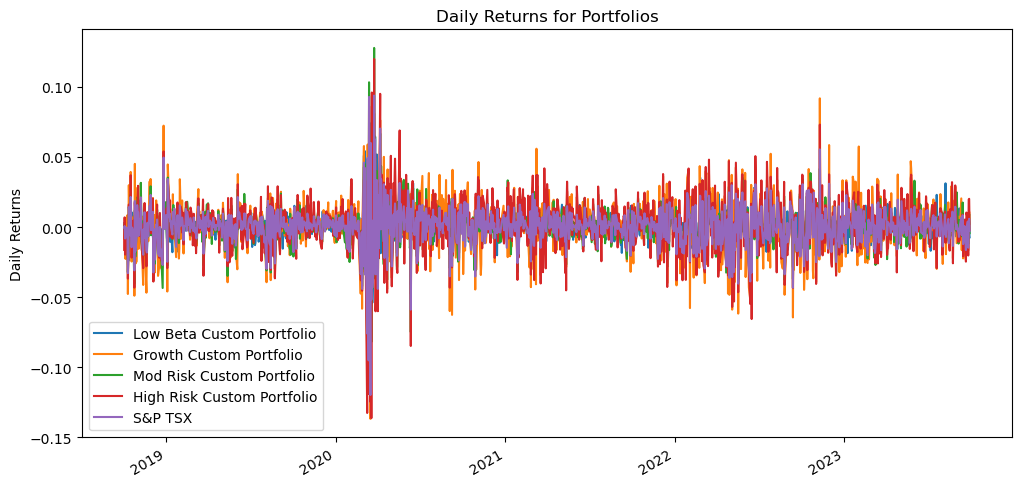

In [43]:
# Plot daily returns of all portfolios
portfolio_combined_df.plot(figsize=(12, 6))
plt.title("Daily Returns for Portfolios")
plt.xlabel("")
plt.ylabel("Daily Returns")
plt.legend(loc="lower left")
plt.show()

### Cumulative Returns

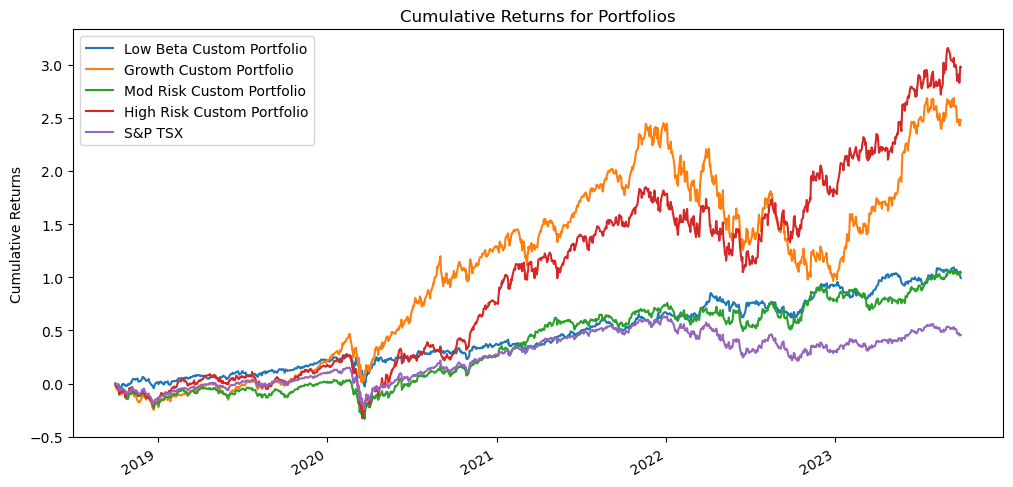

In [44]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + portfolio_combined_df).cumprod() - 1

# Plot cumulative returns for all portfolios
cumulative_returns.plot(figsize=(12, 6))
plt.title("Cumulative Returns for Portfolios")
plt.xlabel("")
plt.ylabel("Cumulative Returns")
plt.legend(loc="upper left")
plt.show()

### Volatility

In [45]:
# Calculate the daily standard deviations of all portfolios
std_deviation = portfolio_combined_df.std()
std_deviation

Low Beta Custom Portfolio     0.010754
Growth Custom Portfolio       0.019601
Mod Risk Custom Portfolio     0.015161
High Risk Custom Portfolio    0.019706
S&P TSX                       0.013749
dtype: float64

In [46]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std_deviation = std_deviation * np.sqrt(252)
annualized_std_deviation

Low Beta Custom Portfolio     0.170707
Growth Custom Portfolio       0.311158
Mod Risk Custom Portfolio     0.240676
High Risk Custom Portfolio    0.312828
S&P TSX                       0.218254
dtype: float64

### Rolling Statistics

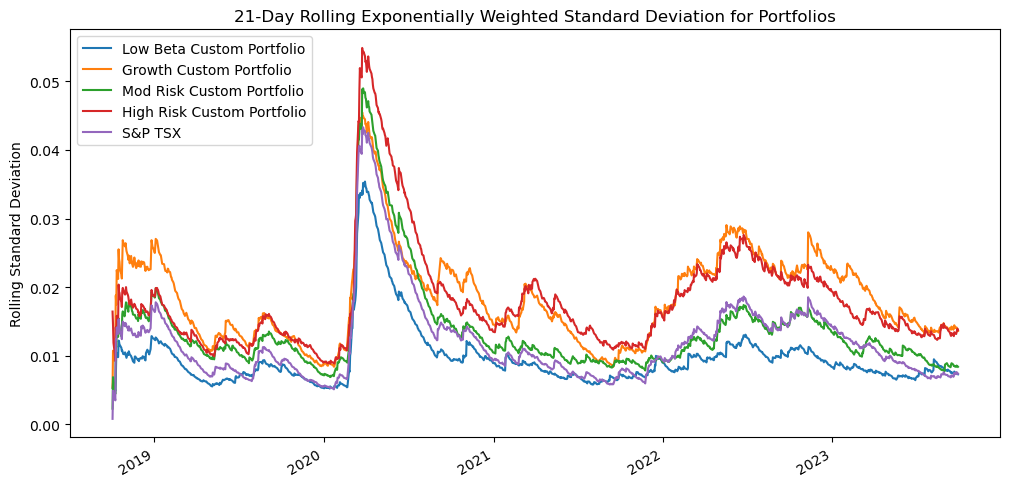

In [47]:
ewm_std = portfolio_combined_df.ewm(halflife=21).std()
ewm_std.dropna()

# Plot rolling standard deviation
ewm_std.plot(figsize=(12, 6))
plt.title("21-Day Rolling Exponentially Weighted Standard Deviation for Portfolios")
plt.xlabel("")
plt.ylabel("Rolling Standard Deviation")
plt.legend(loc="upper left")
plt.show()

<Axes: >

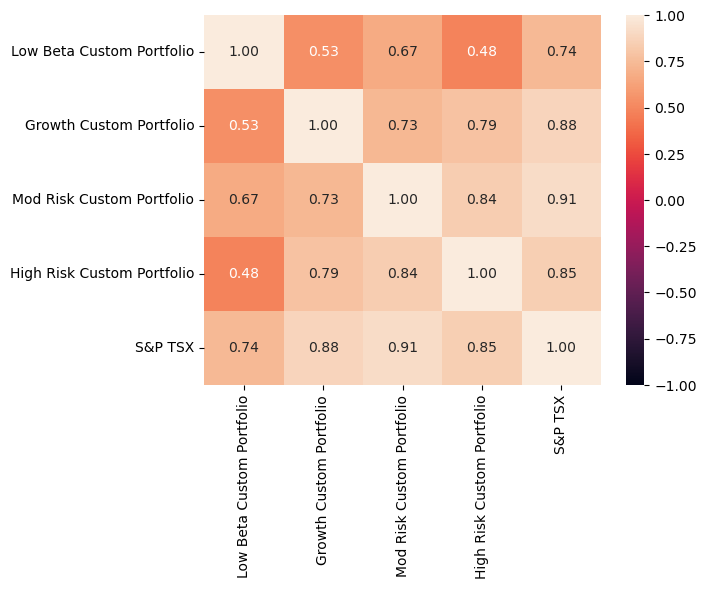

In [48]:
# Calculate and plot the correlation
portfolio_correlation = portfolio_combined_df.corr()

# Use the `heatmap` function from the Seaborn library to visualize correlations
sns.heatmap(portfolio_correlation, vmin=-1, vmax=1, annot=True, fmt=".2f")

### Beta

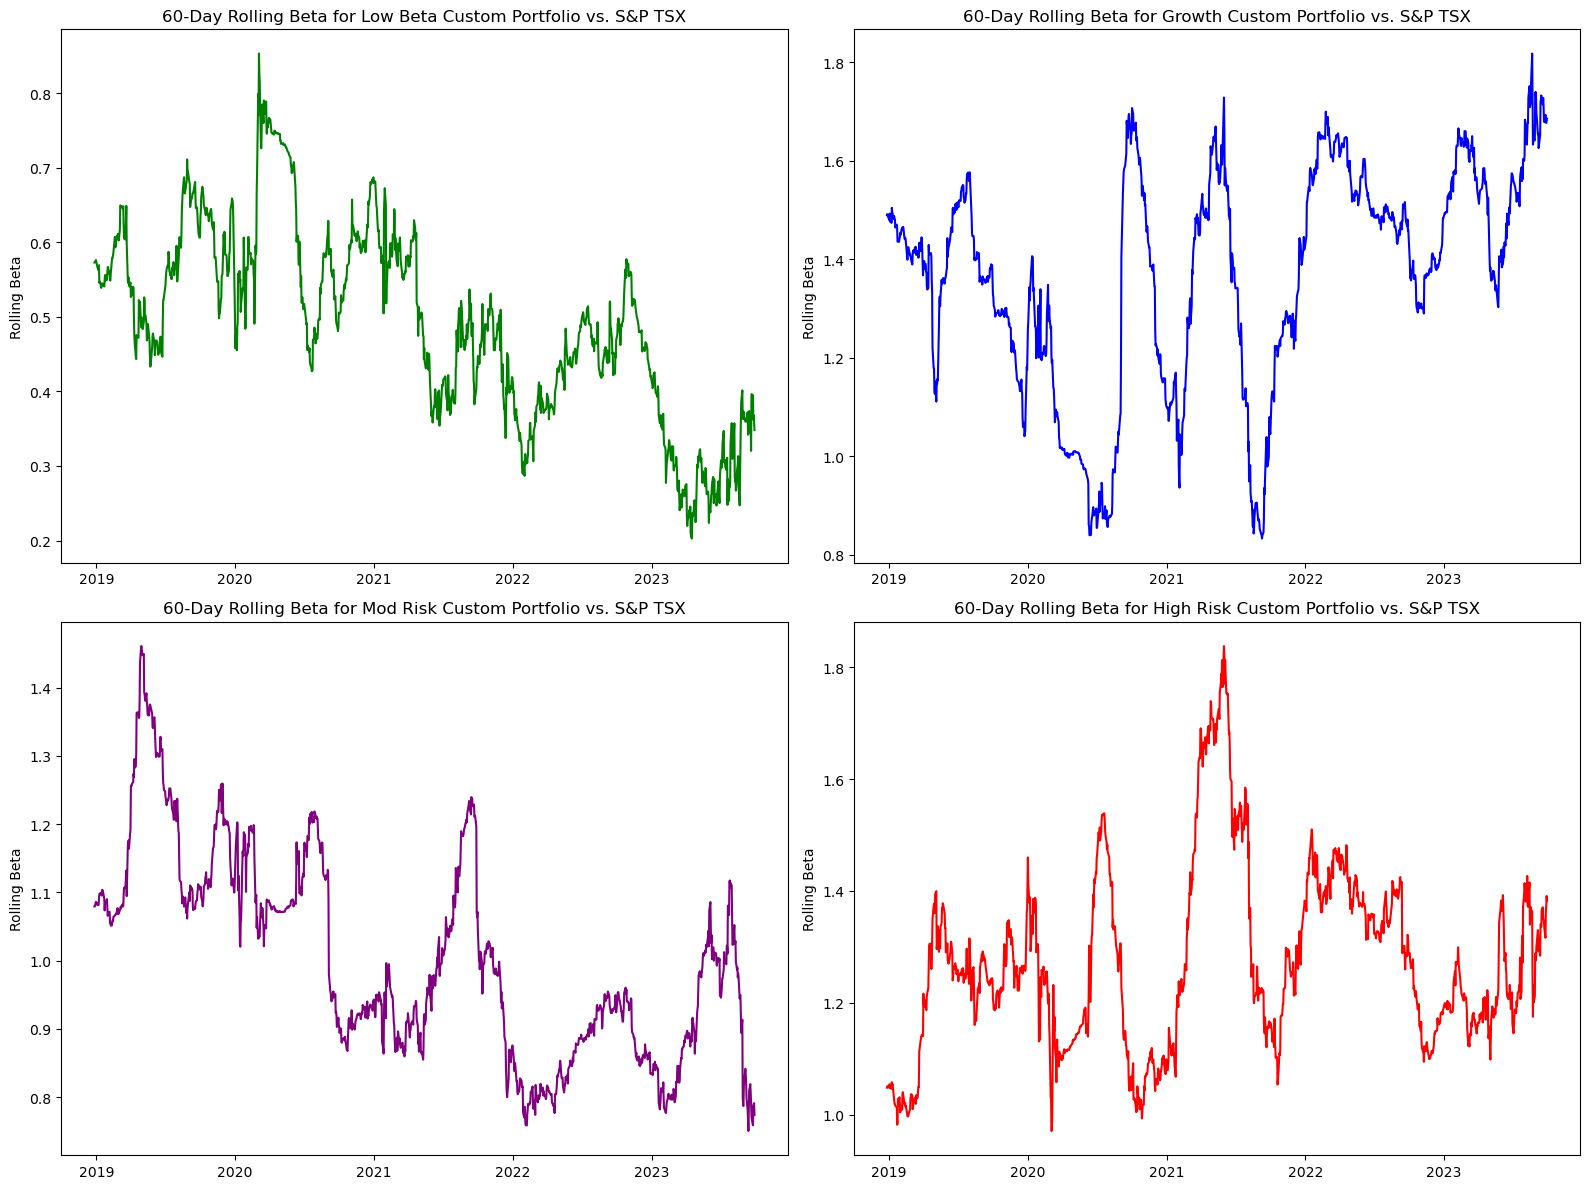

In [49]:
# Calculate variance of S&P TSX
rolling_variance = portfolio_combined_df["S&P TSX"].rolling(window=60).var()

# Calculate rolling beta values for each portfolio
rolling_beta_1 = (portfolio_combined_df["Low Beta Custom Portfolio"].rolling(window=60).cov(portfolio_combined_df["S&P TSX"])) / rolling_variance
rolling_beta_2 = (portfolio_combined_df["Growth Custom Portfolio"].rolling(window=60).cov(portfolio_combined_df["S&P TSX"])) / rolling_variance
rolling_beta_3 = (portfolio_combined_df["Mod Risk Custom Portfolio"].rolling(window=60).cov(portfolio_combined_df["S&P TSX"])) / rolling_variance
rolling_beta_4 = (portfolio_combined_df["High Risk Custom Portfolio"].rolling(window=60).cov(portfolio_combined_df["S&P TSX"])) / rolling_variance

# Create a figure with a 4x4 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(16, 12))

# Colors
colors = ['green', 'blue', 'purple', 'red']

# Define the portfolio names and their corresponding rolling beta series
portfolio_names = ["Low Beta Custom Portfolio", "Growth Custom Portfolio", "Mod Risk Custom Portfolio", "High Risk Custom Portfolio"]
rolling_beta_series = [rolling_beta_1, rolling_beta_2, rolling_beta_3, rolling_beta_4]

# Loop through the subplots and plot the rolling beta for each portfolio
for i, ax in enumerate(axs.flat):
    ax.plot(rolling_beta_series[i], color=colors[i])
    ax.set_title(f"60-Day Rolling Beta for {portfolio_names[i]} vs. S&P TSX")
    ax.set_xlabel("")
    ax.set_ylabel("Rolling Beta")

# Adjust the layout and spacing of subplots
plt.tight_layout()

# Show the plot
plt.show()

### Sharpe Ratios

In [50]:
# Annualized Sharpe Ratios
sharpe_ratios = (portfolio_combined_df.mean() * 252) / annualized_std_deviation
sharpe_ratios

Low Beta Custom Portfolio     0.896573
Growth Custom Portfolio       0.960244
Mod Risk Custom Portfolio     0.717817
High Risk Custom Portfolio    1.043122
S&P TSX                       0.456334
dtype: float64

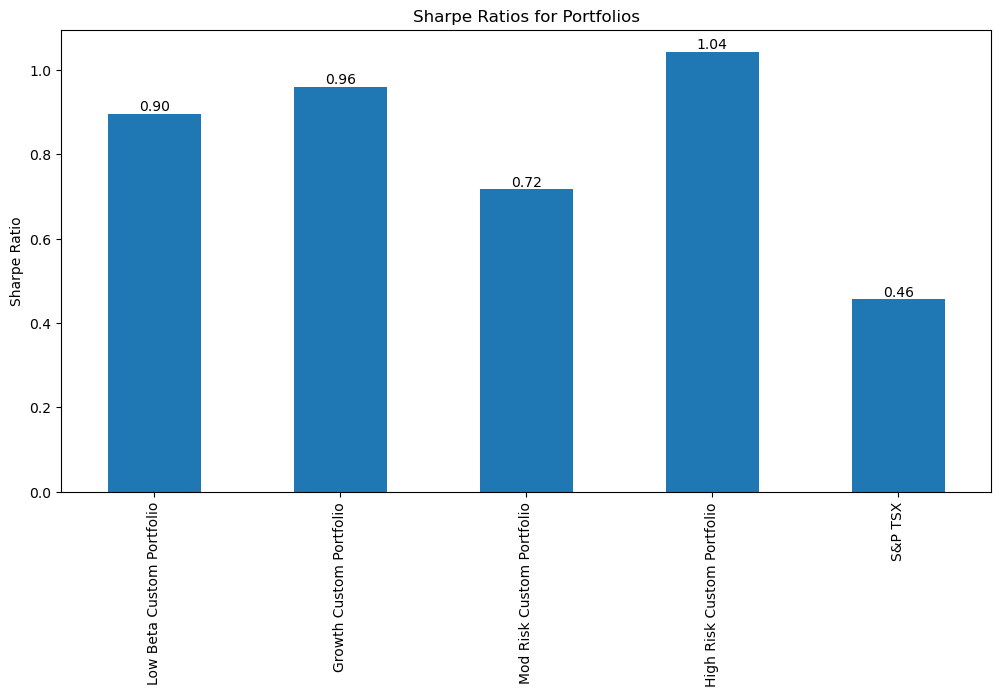

In [52]:
# Create the bar plot
ax = sharpe_ratios.plot(kind="bar", figsize=(12, 6))
plt.title("Sharpe Ratios for Portfolios")
plt.ylabel("Sharpe Ratio")

# Add data labels to the bars
for i, v in enumerate(sharpe_ratios):
    ax.text(i, v, f"{v:.2f}", ha='center', va='bottom')

plt.show()